In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils.convert import to_networkx

from data.embedding import MinimalEmbedding, NoWallsEmbedding
from data.dataset import InMemorySokobanDataset
from data.graph_env import GraphEnv

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
SEED = 42
TRAIN_PATH = "levels/very_easy/train"

In [4]:
dataset = InMemorySokobanDataset(TRAIN_PATH, NoWallsEmbedding())
graph_env = GraphEnv()
random.seed(SEED)
np.random.seed(SEED)
state = dataset[0]
graph_env.reset(state)

In [5]:
def show_graph(state, pos_map, node_text=None, node_color=None, title=""):
    plt.figure(1, figsize=(4,4)) 
    plt.title(title)
    nx.draw(to_networkx(state), 
            cmap=plt.get_cmap('seismic'), 
            node_color=node_color, 
            labels=node_text, 
            node_size=400, 
            linewidths=6, 
            font_color="w",
            pos=pos_map)
    plt.show()

In [6]:
pos_map = {i: pos.numpy() for i, pos in enumerate(state.pos)}

# Swap x, y, invert y
pos_map = {i: np.array([x, y]) for i, (y, x) in pos_map.items()}
max_y = max([y for x, y in pos_map.values()])
pos_map = {i: np.array([x, max_y - y]) for i, (x, y) in pos_map.items()}

# Nodes indexes
labels = {i: str(i) for i in range(len(state.x))}

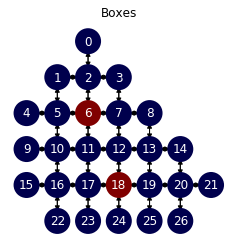

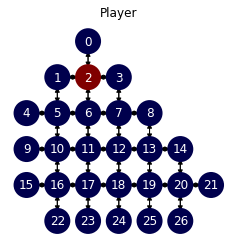

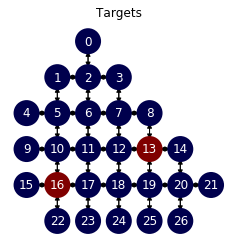

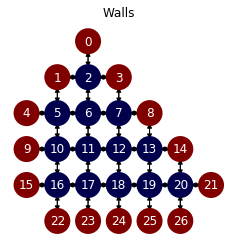

In [7]:
state = graph_env.render()
show_graph(state, pos_map, node_color=state.x[:, 0], title="Boxes")
show_graph(state, pos_map, node_color=state.x[:, 1], title="Player")
show_graph(state, pos_map, node_color=state.x[:, 2], title="Targets")
show_graph(state, pos_map, node_color=state.x[:, 3], title="Walls")

## Deadlock

In [8]:
action_list = [6, 5, 10, 16, 17, 18, 19]
for action in action_list:
    print(graph_env.step(torch.tensor(action)))

(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': True})


In [10]:
graph_env.reset(state)

In [11]:
action_list = [6, 5, 10, 11, 12]
for action in action_list:
    print(graph_env.step(torch.tensor(action)))

(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), -0.1, False, {'deadlock': False})
(Data(edge_index=[2, 70], mask=[27, 1], player_idx=[1], pos=[27, 2], x=[27, 4]), 0.9, False, {'deadlock': False})
